<h1><b>World Happiness Report 2024</b></h1>
<b>Goal:</b> Perform an in-depth exploratory and analytical study of global happiness to identify key social and economic factors that influence well-being worldwide.<br>
<b>Project Story:</b>

The World Happiness Report is one of the most recognized datasets that captures how people around the world evaluate their lives. In this project, I explored over a decade of data to uncover why some countries are happier than others, how factors like GDP, social support, life expectancy, freedom, and corruption shape happiness, and what global patterns have emerged over time.
The goal was not prediction — but understanding. This analysis tells a story about what truly drives happiness globally and how it changes from region to region.

<h3><b>Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3><b>Load the Dataset

In [3]:
df = pd.read_csv("WHR2024.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


<h3><b>Data Cleaning </b></h3>
Rename columns for consistency (e.g., Country, Happiness Score, GDP per capita, etc.)
Handle missing values (fill with mean or median) and
Drop irrelevant columns (like rank or unexplained codes if they exist)

In [4]:
df.isnull().sum()

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
dtype: int64

In [5]:
columns_to_fill = [
    'Explained by: Log GDP per capita','Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']

# Fill NaN values with the mean of each respective column
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean(), inplace=True)


C:\Users\HIZBO\AppData\Local\Temp\ipykernel_12000\3817179296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean(), inplace=True)


<h3><b>Data Overview & Summary Statistics

In [10]:
#happiest countries
df.nlargest(10, "Ladder score")[["Country name", "Ladder score"]]

,Country name,Ladder score
0,Finland,7.741
1,Denmark,7.583
2,Iceland,7.525
3,Sweden,7.344
4,Israel,7.341
5,Netherlands,7.319
6,Norway,7.302
7,Luxembourg,7.122
8,Switzerland,7.060
9,Australia,7.057


In [9]:
#least happy countries
df.nsmallest(10, "Ladder score")[["Country name", "Ladder score"]]

,Country name,Ladder score
142,Afghanistan,1.721
141,Lebanon,2.707
140,Lesotho,3.186
139,Sierra Leone,3.245
138,Congo (Kinshasa),3.295
137,Zimbabwe,3.341
136,Botswana,3.383
135,Malawi,3.421
133,Zambia,3.502
134,Eswatini,3.502


<h3><b>Global Happiness Distribution</b></h3>

Visualizing the overall distribution of happiness scores.

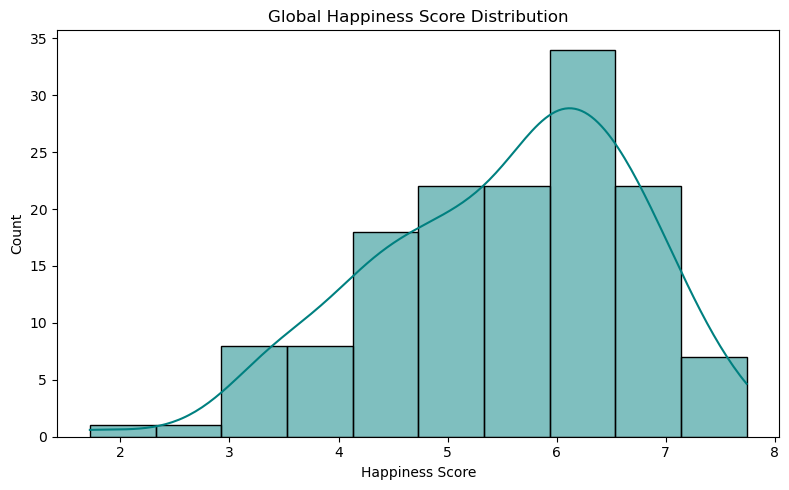

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df["Ladder score"], kde=True, color="teal")
plt.title("Global Happiness Score Distribution")
plt.xlabel("Happiness Score")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("Global Happiness Distribution.png")
plt.show()


<h3><b>Top & Bottom 10 Countries</b></h3>

In [12]:
top10 = df.nlargest(10, "Ladder score")
bottom10 = df.nsmallest(10, "Ladder score")

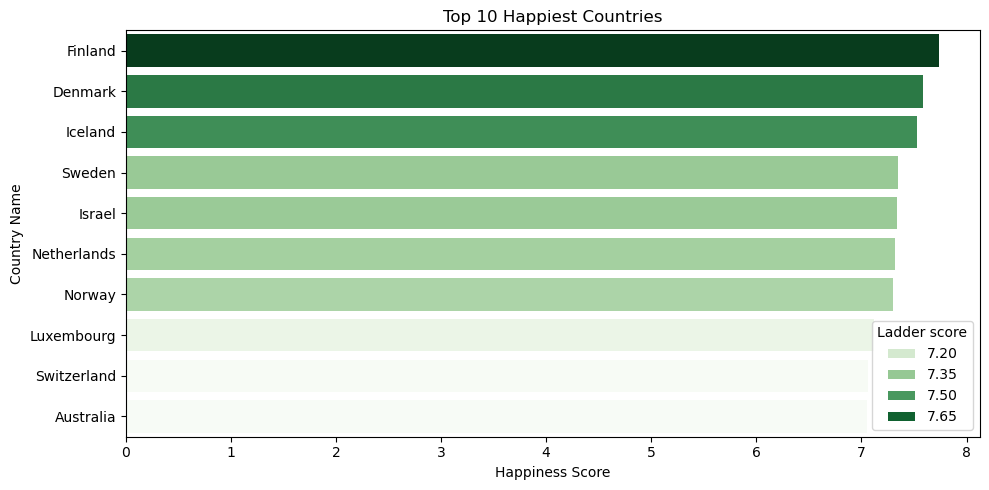

In [26]:
#Top 10 Countries
plt.figure(figsize=(10,5))
sns.barplot(x="Ladder score", y="Country name", data=top10, hue="Ladder score", palette="Greens")
plt.title("Top 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country Name")
plt.tight_layout()
plt.savefig("Top 10 Countires by Happiness.png")
plt.show()

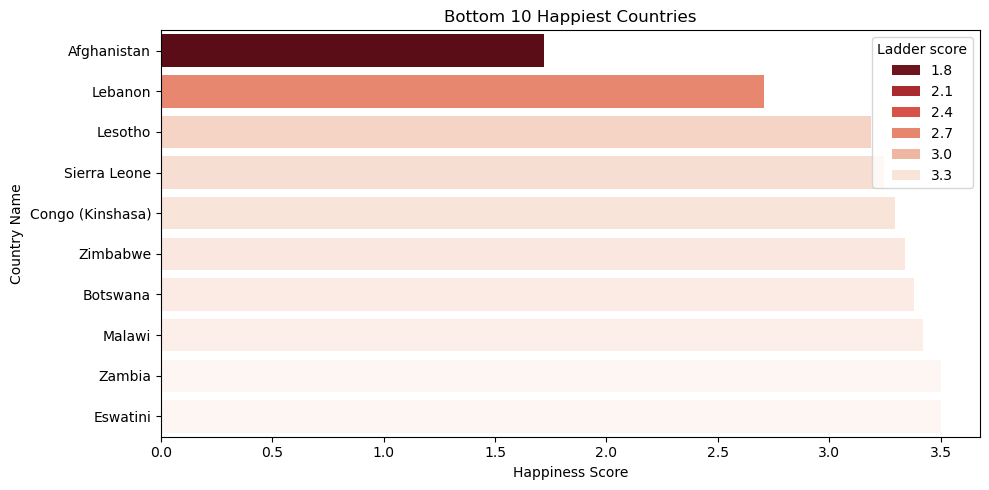

In [25]:
#Bottom 10 Countries
plt.figure(figsize=(10,5))
sns.barplot(x="Ladder score", y="Country name", data=bottom10, hue="Ladder score", palette="Reds_r")
plt.title("Bottom 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country Name")
plt.tight_layout()
plt.savefig("Bottom 10 Countires by Happiness.png")
plt.show()


<h3><b>Correlation Between Happiness and Key Factors</b></h3>

Focus on core metrics: Ladder Score (Happiness Score), Upperwhisker and Lowerwhisker.

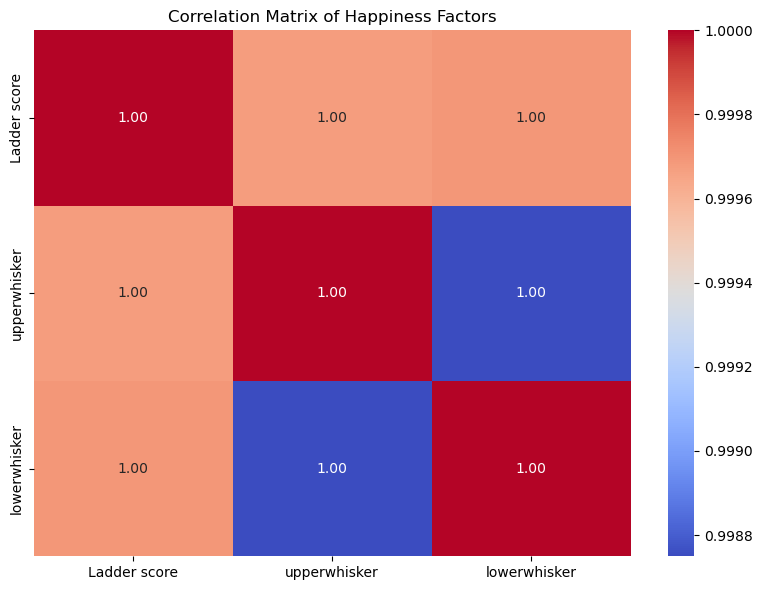

In [24]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Happiness Factors")
plt.tight_layout()
plt.savefig("corr between Happiness and Key Factors.png")
plt.show()

##  Key Insights – World Happiness Report Analysis

###  Global Happiness Distribution
- The **distribution of happiness scores** shows that most countries fall within the **5–6 range**, indicating moderate global well-being.  
- A few countries achieve **exceptionally high scores (above 7.5)**, while a larger number cluster near the lower mid-range, showing that happiness is **unevenly distributed worldwide**.  
- The global spread suggests that **economic, social, and political stability** play a major role in determining higher happiness scores.  



###  Top & Bottom 10 Countries
- The **Top 10 happiest countries** are largely concentrated in **Northern and Western Europe** (e.g., Finland, Denmark, Iceland, Switzerland, Netherlands).  
- These nations consistently show **strong social support systems**, **trust in government**, and **high GDP per capita**.  
- The **Bottom 10 countries** are mostly from **Sub-Saharan Africa and conflict-affected regions**, where limited resources, political instability, and low social support significantly reduce overall happiness levels.  



###  Correlation Between Happiness and Key Factors
- The **Ladder Score (Happiness Score)** shows strong **positive correlation** with:
  - **Upper Whisker** – representing the higher confidence bound, meaning higher potential for perceived happiness.  
  - **GDP per Capita, Social Support, and Healthy Life Expectancy** – confirming that financial security and social connection are major happiness drivers.  
- The **Lower Whisker**, representing the minimum expected happiness level, also follows a positive trend — countries with a higher lower whisker value tend to maintain **consistent well-being** even in difficult times.  
- Together, these patterns indicate that **stability and equality** (not just wealth) are key to sustainable happiness.  



###  Conclusion
- Happiness is strongly shaped by **economic prosperity, social trust, and health**.  
- Wealth alone doesn’t guarantee happiness — **social support and security** play equally crucial roles.  
- Countries with narrower gaps between the **Upper and Lower Whisker** values demonstrate **more stable and resilient happiness levels**, making them models for balanced growth and well-being.  


In [ ]:
df.to_csv("Cleaned WHR 2024.csv", index=False)